# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [21]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [22]:
url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    print("Página descargada correctamente.")
else:
    print(f"Error al descargar la página: {response.status_code}")



Página descargada correctamente.


In [23]:
soup = BeautifulSoup(html_content, "html.parser")

tables = soup.find_all("table")

print(f"Se encontraron {len(tables)} tablas en la página.")
tables

Se encontraron 2 tablas en la página.


[<table class="table" style="width:100%">
 <thead>
 <tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>
 </thead>
 <tbody>
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">

In [24]:
for i, table in enumerate(tables):
    rows = table.find_all("tr")
    columns = len(rows[0].find_all("th")) if rows else 0  # Número de columnas (encabezados)
    print(f"Tabla {i + 1}: {len(rows)} filas, {columns} columnas")

Tabla 1: 17 filas, 3 columnas
Tabla 2: 2 filas, 4 columnas


In [28]:
tabla_correcta = tables[0]

# Extraer las filas de la tabla
filas = tabla_correcta.find_all("tr")

data = []
for filas in filas[1:]:  # Saltar la fila de encabezado
    col = filas.find_all("td")
    fecha = col[0].text.strip()
    ingresos = col[1].text.strip()
    data.append([fecha, ingresos])

data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [29]:
df = pd.DataFrame(data, columns=["Fecha", "Ingresos"])

# Ordenar los datos por la columna "Fecha" de menor a mayor 
df = df.sort_values("Fecha")

df

,Fecha,Ingresos
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B
10,2014,$3.19 B
9,2015,$4.04 B
8,2016,$7.00 B
7,2017,$11.75 B
6,2018,$21.46 B


In [31]:
# Limpiar las columnas que contienen símbolos como "$", "B" y comas
df_cleaned = df.replace({'\$': '', 'B': '', ',': ''}, regex=True)

# Convertir los valores a números, forzando NaN en los que no se puedan convertir
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores vacíos o NaN
df_cleaned = df_cleaned.dropna()

# Mostrar las primeras filas del DataFrame limpio
print(df_cleaned)

    Fecha  Ingresos
15   2009      0.11
14   2010      0.11
13   2011      0.20
12   2012      0.41
11   2013      2.01
10   2014      3.19
9    2015      4.04
8    2016      7.00
7    2017     11.75
6    2018     21.46
5    2019     24.57
4    2020     31.53
3    2021     53.82
2    2022     81.46
1    2023     96.77
0    2024     97.15


In [32]:
# Verificar la cantidad de filas y columnas del DataFrame antes de limpiar
print(f"Filas: {len(df)}, Columnas: {df.shape[1]}")
print(df.head(10))  # Mostrar los primeros 10 registros

Filas: 16, Columnas: 2
   Fecha  Ingresos
15  2009   $0.11 B
14  2010   $0.11 B
13  2011   $0.20 B
12  2012   $0.41 B
11  2013   $2.01 B
10  2014   $3.19 B
9   2015   $4.04 B
8   2016   $7.00 B
7   2017  $11.75 B
6   2018  $21.46 B


In [34]:
# Conectar a la base de datos (se creará si no existe)
conn = sqlite3.connect("tesla_data.db")
cursor = conn.cursor()

# Crear la tabla (ajusta los tipos de datos según el DataFrame)
cursor.execute("""
    CREATE TABLE IF NOT EXISTS tesla_revenue (
        year INTEGER PRIMARY KEY,
        revenue REAL,
        change REAL
    )
""")

conn.commit()  # Guardar cambios
print("Base de datos y tabla creadas correctamente.")

Base de datos y tabla creadas correctamente.


In [35]:
# Insertar los datos en la base de datos
df_cleaned.to_sql("tesla_revenue", conn, if_exists="replace", index=False)

print("Datos insertados correctamente en la base de datos.")

Datos insertados correctamente en la base de datos.


In [36]:
# Leer los datos desde SQLite
df_sql = pd.read_sql("SELECT * FROM tesla_revenue", conn)

# Mostrar las primeras filas
print(df_sql.head())

   Fecha  Ingresos
0   2009      0.11
1   2010      0.11
2   2011      0.20
3   2012      0.41
4   2013      2.01


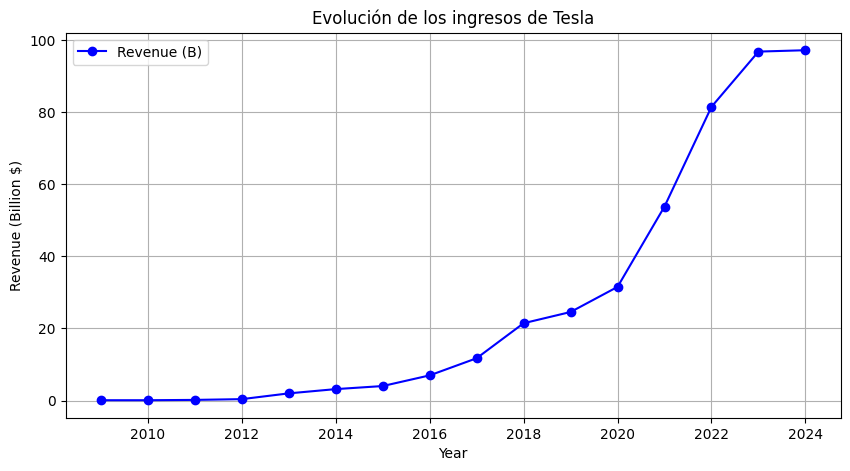

In [39]:
# Gráfico de ingresos por año
plt.figure(figsize=(10, 5))
plt.plot(df_sql["Fecha"], df_sql["Ingresos"], marker="o", linestyle="-", color="b", label="Revenue (B)")
plt.xlabel("Year")
plt.ylabel("Revenue (Billion $)")
plt.title("Evolución de los ingresos de Tesla")
plt.legend()
plt.grid()
plt.show()